# Анализ исходных данных

Перед нами данные из открытых источников продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation. Нам нужно выявить определяющие успешность игры закономерности. 

Для начала, проанализируем исходные данные:

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("/datasets/games.csv")

In [42]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


array([[<AxesSubplot:title={'center':'Year_of_Release'}>,
        <AxesSubplot:title={'center':'NA_sales'}>],
       [<AxesSubplot:title={'center':'EU_sales'}>,
        <AxesSubplot:title={'center':'JP_sales'}>],
       [<AxesSubplot:title={'center':'Other_sales'}>,
        <AxesSubplot:title={'center':'Critic_Score'}>]], dtype=object)

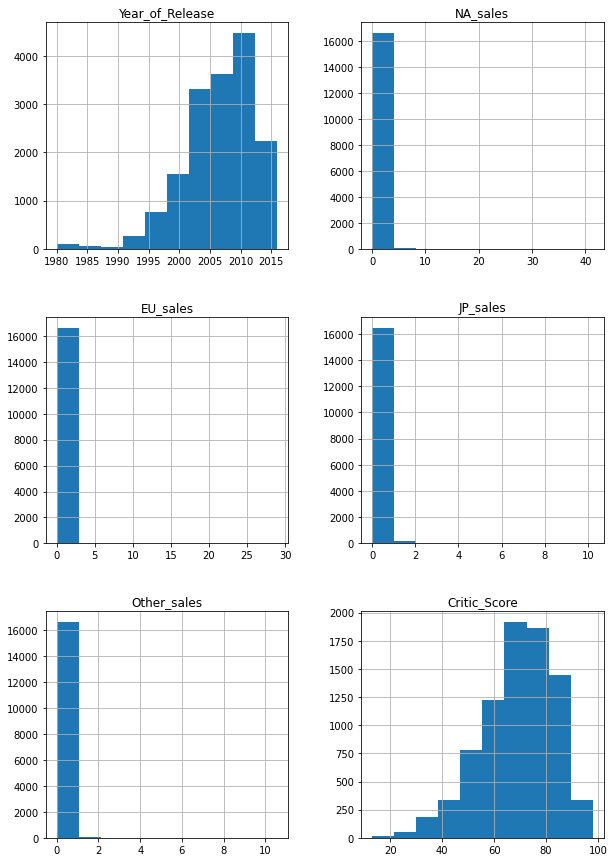

In [44]:
display(data.hist(figsize = (10,15)))

Так же, проверим на количество пропусков в разных столбцах и на наличие явных дубликатов. 

In [45]:
display(data.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [46]:
display(data.duplicated().sum())

0

Из анализа исходных данных видно, что присутствует: 

    -неправильный формат столбцов: "Year_of_Release","NA_sales","EU_sales","JP_sales","Other_sales" и "User_score"
    
    -неправильное название столбцов
    
    -наличее пропусков в столбцах: "Name","Year_of_Release","Genre","Critic_Score","User_Score" и "Rating"

Так же, стоит рассмотреть данные по продажам, так как графики не выглядят правильными, показывая что большинство игр продавалось по 1-2 копии.  

# Предобработка данных

**Название столбцов**

Как можно было заметить, названия столбцов указанны с большой быквы:

In [47]:
display(data.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Исправляем:

In [48]:
data.columns = data.columns.str.lower()

**Year of Release**

Как можно заметить, данные "year_of_release" хранятся в формате float, что неверно так как год не бывает рациональным. Но сначала нужно удалить строки где год игры не известен, так как эту информацию мы не сможем воссоздать. 

In [49]:
data = data[~data["year_of_release"].isna()]

In [50]:
data["year_of_release"] = data["year_of_release"].astype(int)

**Name**

В данных отсутствует два названия: 

In [51]:
display(data[data["name"].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как оказалось, это теже строки, что не имеют значения "genre". В связи с тем, что воспроизвести данные нет возможности, строки лучше удалить:

In [52]:
data = data[~data["name"].isna()]

**User Score Format**

In [53]:
display(data["user_score"].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как можно заметить, кто-то понаставил "tbd". Значение можно заменить на nan, так как на момент анализа еще не добавили значения, а поставили аббревиатуру "будет сделано" и мы не как его не сможем "придумать" сами. А так же, изменим формат на float, сразу как уберем "tbd"

In [54]:
data.loc[data["user_score"] == "tbd","user_score"] = np.nan

In [55]:
data["user_score"] = data["user_score"].astype(float)

**Critic Score, User Score, Rating - cross platform**

In [56]:
display(data.isna().sum().tail(3))

critic_score    8461
user_score      8981
rating          6676
dtype: int64

Так как платформа во многом не влияет на рейтинг или оценку игры, то можно заполнить некоторые пропуски за счет копирования рейтинга и оценок для одной и той же игры с другой платформы. 

In [57]:
for i in data.name.unique():
    if data.loc[(data['name'] == i) & (~data['rating'].isna()), 'rating'].value_counts().max() > 0:
        data.loc[(data['name'] == i) & (data['rating'].isna()), 'rating'] = \
        data.loc[(data['name'] == i) & (~data['rating'].isna()), 'rating'].value_counts().index[0]

In [58]:
for i in data.name.unique():
    if data.loc[(data['name'] == i) & (~data['user_score'].isna()), 'user_score'].value_counts().max() > 0:
        data.loc[(data['name'] == i) & (data['user_score'].isna()), 'user_score'] = \
        data.loc[(data['name'] == i) & (~data['user_score'].isna()), 'user_score'].value_counts().index[0]

In [59]:
for i in data.name.unique():
    if data.loc[(data['name'] == i) & (~data['critic_score'].isna()), 'critic_score'].value_counts().max() > 0:
        data.loc[(data['name'] == i) & (data['critic_score'].isna()), 'critic_score'] = \
        data.loc[(data['name'] == i) & (~data['critic_score'].isna()), 'critic_score'].value_counts().index[0]

In [60]:
display(data.isna().sum().tail(3))

critic_score    7522
user_score      7920
rating          6259
dtype: int64

Количество пропусков снизилось, что хорошо, но не сошло на ноль. Оставшиеся пропуски придется оставить, так как нет другого способа чем можно заменить пропуски. 

**Rating** 

Нужно понимать, что рейтинг ESRB - не обязательная часть для выпуска игры. И основание организации произошло только в 1994 года, хотя данные у нас с 1980 года. Поэтому, пропуски стоит заменить на "Unrated"

In [61]:
data["rating"] = data["rating"].fillna("Unrated")

Тем самым, мы как бы создаем дополнительный рейтинг, и позже можем посмотреть влияет ли он на успех игры. 

**Sales**

In [62]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unrated
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unrated


Проблем нет. 

**Total Sales**

Для будущего анализа, нужно создать столбец с суммарными продажами:

In [63]:
data["total_sales"] = data["eu_sales"] + data["jp_sales"] + data["na_sales"] + data["other_sales"]

In [64]:
display(data.head(1))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


**Genre**

In [65]:
display(data["genre"].unique())

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Проблем нет. 

**Platform**

In [66]:
display(data["platform"].unique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Проблем нет. 

**Rating**

In [67]:
display(data["rating"].unique())

array(['E', 'Unrated', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Следуя из информации о рейтинге ESRB, рейтинг переименовал рейтинг К-А в Е в 1998 году, поэтому следуen переименовать его и в наших данных, так как это один и тот же рейниг: 

In [68]:
data.loc[data["rating"] == "K-A","rating"] = "E"

Так же, рейтинг RP значит, что еще в процессе оценки или как модно говорить "tbd", поэтому его мы заменим на "Unrated":

In [69]:
data.loc[data["rating"] == "RP","rating"] = "Unrated"

**Результат**

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8922 non-null   float64
 9   user_score       8524 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


Как видно из общего анализа, все замечания по максимуму были устранены.

# Проведите исследовательский анализ данных

**Games Released per Platform per Year** 

<AxesSubplot:title={'center':'Games Released per Every Year'}, xlabel='year_of_release'>

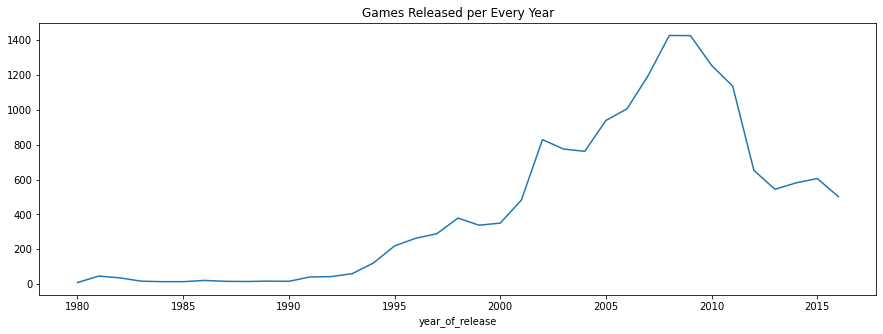

In [71]:
display(data.groupby("year_of_release")["name"].count().plot(figsize = (15,5), title = "Games Released per Every Year"))

Вывод: из данных видно, что 1993 года количество выпускаемых игр увеличивалось вплоть до 2008 года, который имеет самоё большое количество выпущенных игр за год. После 2009, количество выпускаемых игр резко начало снижаться вплоть до 2016 года.

Из данных видно, что есть два периода, до и после 2000 года. Так как именно после этого года интерес к видеоиграм достиг другого уровня. Поэтому, нельзя сравнивать все данные из последних лет с данными из первых годов.

Так как нас интересует анализ данных для прогноза на 2017 год и для анализа поведения рынка, то нам стоит сфокусировать наше внимание на период после 2000 года, когда интерес к играм начал расти и общая динамика рынка поменялась.

In [72]:
data = data[data["year_of_release"] >= 2000]

**Sales per Platform** 

Составим новую таблицу с продажами по платформе по годам:

In [73]:
sales_per_platform_per_year = \
data.pivot_table(index = "year_of_release", columns = "platform", values = "total_sales",aggfunc="sum")

Оставим только 10 самых популярных платформ:

In [74]:
sales_per_platform_per_year = \
sales_per_platform_per_year[list(data.groupby("platform")["total_sales"]\
                                 .sum().sort_values(ascending = False).head(10).index.values)]

<AxesSubplot:title={'center':'Sales per Platform per Year - Top 10'}, xlabel='year_of_release'>

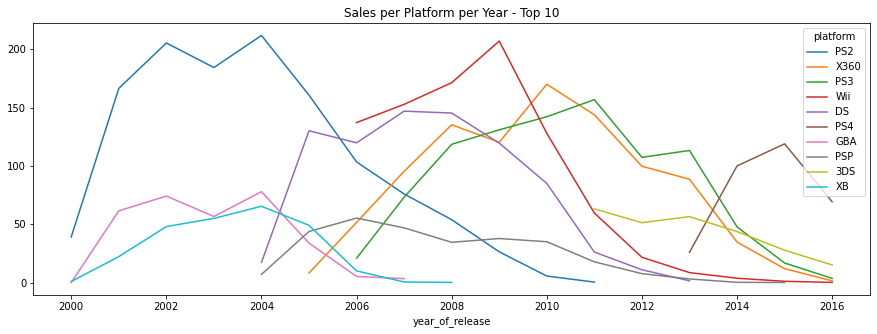

In [75]:
plt.show()
display(sales_per_platform_per_year.plot(figsize = (15,5), title = "Sales per Platform per Year - Top 10"))


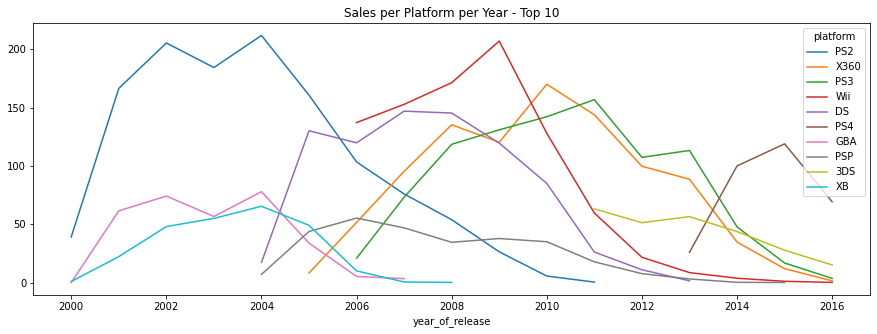

In [76]:
# код ревьюера
import matplotlib.pyplot as plt
sales_per_platform_per_year.plot(figsize = (15,5), title = "Sales per Platform per Year - Top 10")
plt.show()

Вывод: как видно из диаграммы, платформы имеют жизненный цикл, который в среднем длится 8 лет. Из которых, примерно два года идет рост продаж, после, 2-4 года стагнации, а далее спад до полной потери продаж.

**2017 Predictions**

Так как у платформы имеют жизненный срок (не включая PC), то для анализа на прогноза на 2017 год, мы можем сфокусировать свое внимание только на последние 4 года (половина жизненного цикла):

In [77]:
data_after_2012 = data[(data["year_of_release"] >= 2012)]

<AxesSubplot:title={'center':'Total Sales per Year of Release'}, xlabel='year_of_release'>

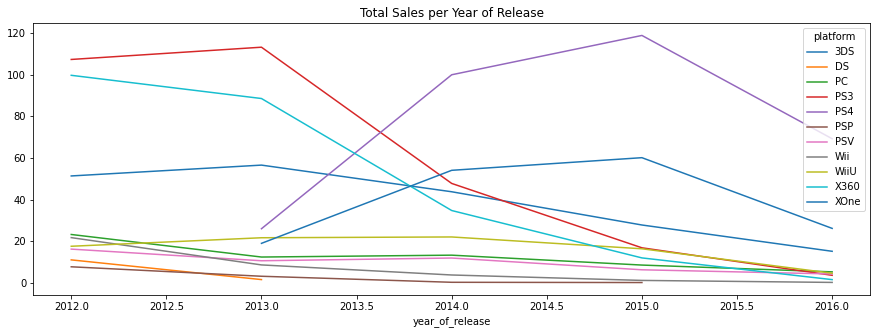

In [78]:
display(data_after_2012.pivot_table(index = "year_of_release", columns = "platform", values = "total_sales", aggfunc = "sum")\
        .plot(figsize = (15,5), title = "Total Sales per Year of Release"))

Вывод: из данных видно, что все продажи подают. Данные очень странные, ведь сложно предположить, что все игроки вдруг перестали играть, а новые не пришли. Скорее всего, нужен дополнительный анализ рынка, так как скорее всего данные не полные и есть упущенная платформа, например мобильные игры, которая забирают себе игроков с других платформ.

Однако, из двух прошлых графиков видно, что продажи игр для платформ которые выпускают новую генерацию, достигают хороших результатов. Следственно, нужно смотреть на появление PS5 и Xbox "что-то там", так как вероятность их успеха видна в истории прошлых генераций.

**Глобальные продажы игр в разбивке по платформам**

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

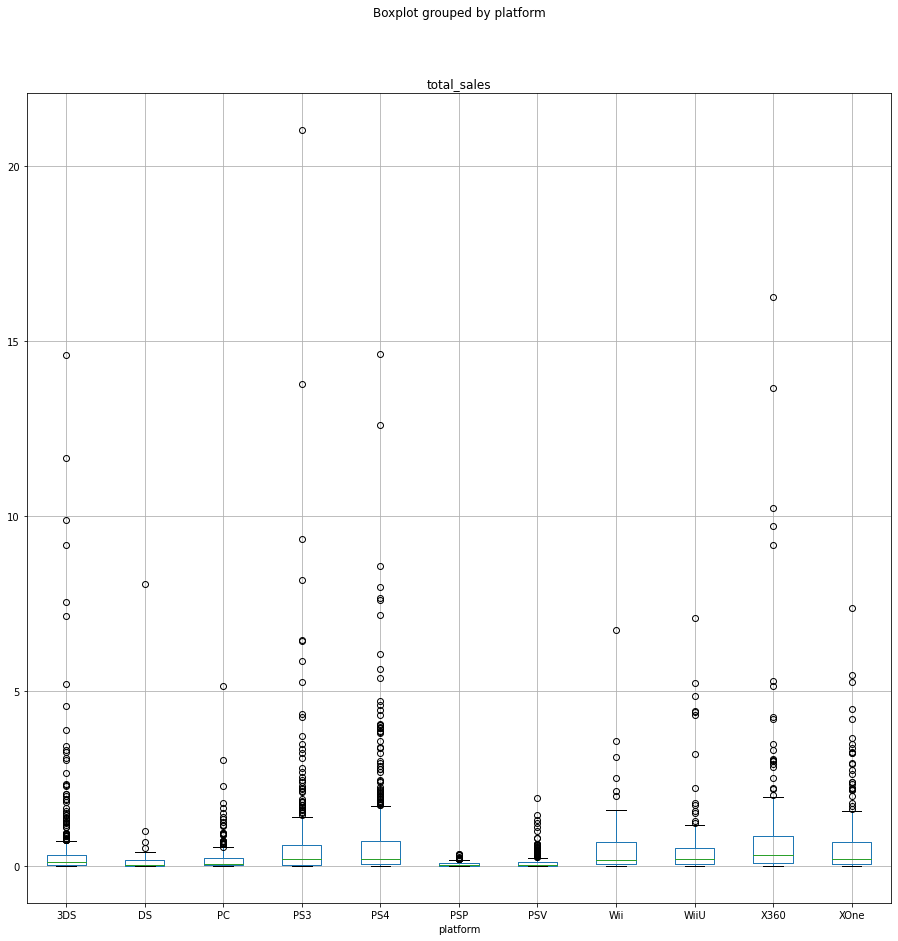

In [79]:
display(data_after_2012.boxplot(column="total_sales", by="platform",figsize = (15,15)))

(0.0, 2.0)

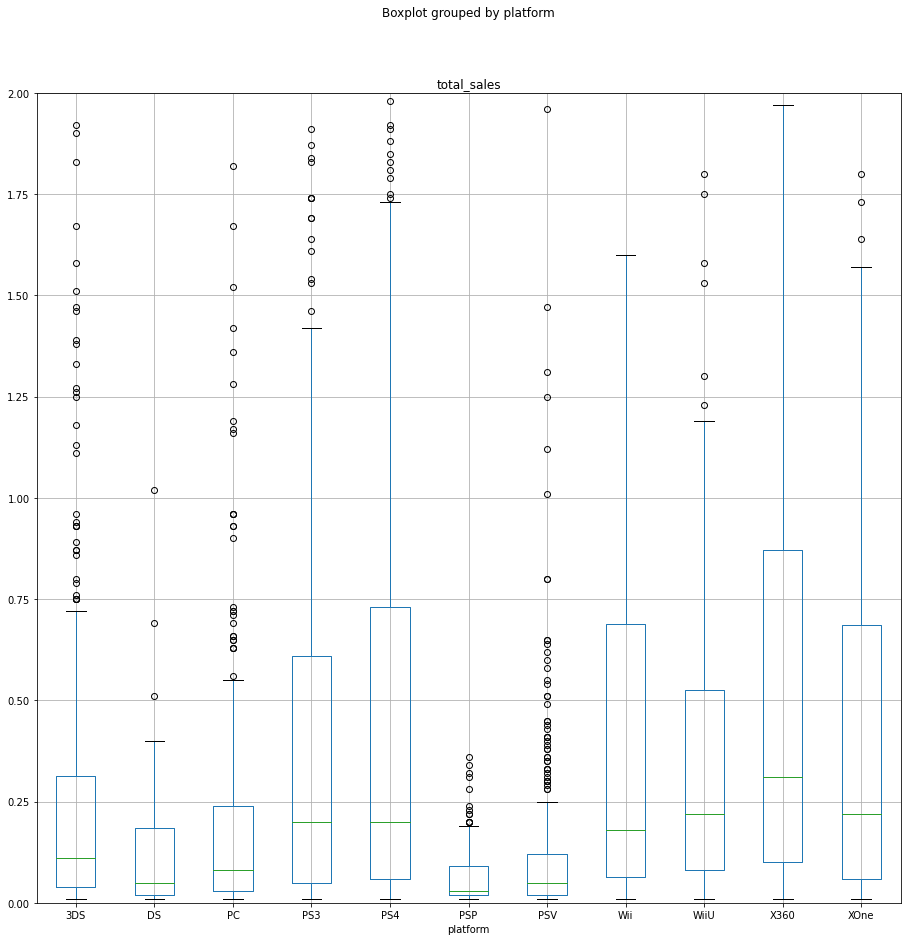

In [80]:
display(data_after_2012.boxplot(column="total_sales", by="platform",figsize = (15,15)).set_ylim(0,2))

Вывод: большинство игр не достигают больших продаж на всех платформах. Но у многих платформ есть хорошее количество игр которые на диаграмме изображены как выбросы и которые выбиваются из общей кучи хорошими продажами. Что можно заметить, таких игр очень мыла у PSP, PSV и DC. 

Из анализа самих box'ов можно заметить, что пятерка лидеров по продажам состовляет: PS3, PS4, X360, XOne, WiiU. С лидерством у X360. А худшии результаты у PSP и PSV. 

**Влияние на продажи отзовов пользователей и критиков**

Из ранее проделанного анализа, было выявлено, что платформа X360 самая популярная за последнее годы, поэтому она будет использована для анализа влияния отзывов критиков и пользователей на продажи игр. 

Однако, стоит взять хотя бы еще одну, вторую, платформу, чтобы убедиться, что результат одинаковый среди разных платформ. Поэтому, еще будет сделан анализ платформы PS3 как прямого конкурента X360 и платформы с хорошими продажами. 

*X360*

In [81]:
x360_data = data[data["platform"] == "X360"]
x360_data = x360_data[["user_score","critic_score","total_sales"]]

<AxesSubplot:title={'center':'User Score VS Total Sales'}, xlabel='user_score'>

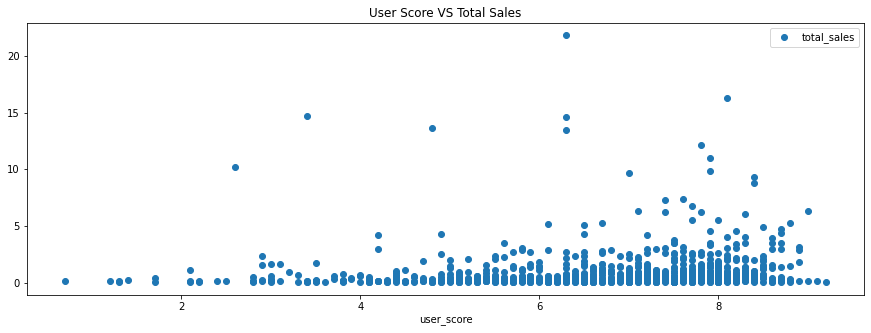

In [82]:
display(x360_data.plot(x ="user_score", y= "total_sales", style = "o", figsize = (15,5), title = "User Score VS Total Sales"))

<AxesSubplot:title={'center':'Critic Score VS Total Sales'}, xlabel='critic_score'>

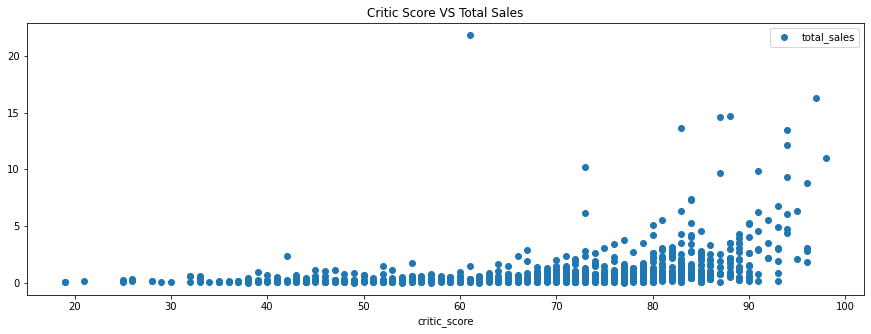

In [83]:
display(x360_data.plot(x ="critic_score", y= "total_sales", style = "o", figsize = (15,5), title = "Critic Score VS Total Sales"))

In [84]:
display(x360_data.corr())

,user_score,critic_score,total_sales
user_score,1.000000,0.548768,0.115375
critic_score,0.548768,1.000000,0.378843
total_sales,0.115375,0.378843,1.000000


*PS3*

In [85]:
ps3_data = data[data["platform"] == "PS3"]
ps3_data = ps3_data[["user_score","critic_score","total_sales"]]

<AxesSubplot:title={'center':'User Score VS Total Sales for X360'}, xlabel='user_score'>

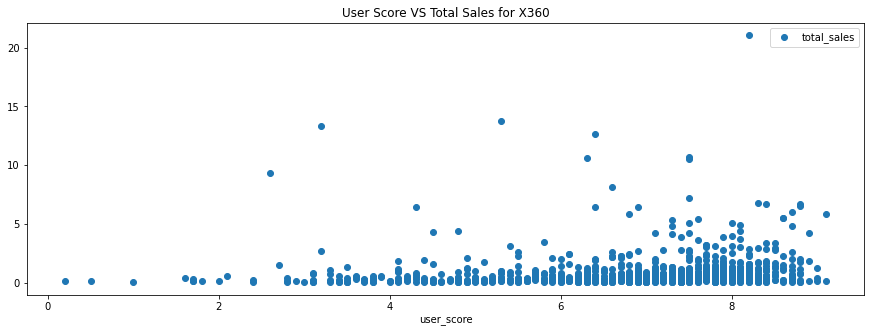

In [86]:
display(ps3_data.plot(x ="user_score", y= "total_sales", style = "o", figsize = (15,5), title = "User Score VS Total Sales for X360"))

<AxesSubplot:title={'center':'Critic Score VS Total Sales for PS3'}, xlabel='critic_score'>

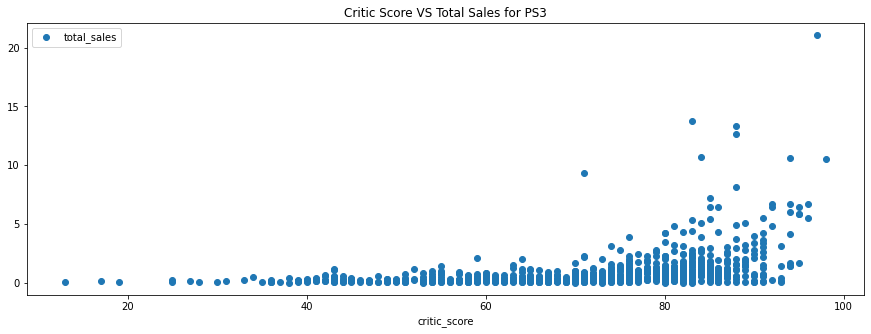

In [87]:
display(ps3_data.plot(x ="critic_score", y= "total_sales", style = "o", figsize = (15,5), title = "Critic Score VS Total Sales for PS3"))

In [88]:
display(ps3_data.corr())

,user_score,critic_score,total_sales
user_score,1.000000,0.547273,0.127118
critic_score,0.547273,1.000000,0.405450
total_sales,0.127118,0.405450,1.000000


Вывод: как видно из результатов, оценки пользователей имеет слабое влияние на общее продажи игр. Однако, оценка критиков уже имеет слабое, но влияние на продажи игр. Так же стоит отметить, что чем больше оценка с обеих сторон, чем больше шанс наткнутся на очень успешную игру (на диаграммах выглядит как выброс). Этот вывод работает для обеих платформ, что означает, что данная закономерность не единичный случай.  

**Общее распределение игр по жанрам**

<AxesSubplot:title={'center':'Genre VS Total Sales'}, xlabel='genre'>

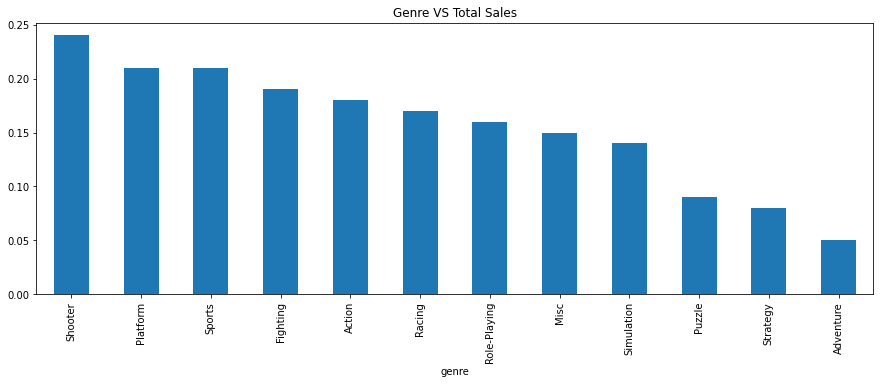

In [89]:
display(data.groupby("genre")["total_sales"].median().sort_values(ascending = False)\
        .plot(figsize = (15,5), kind = "bar", title = "Genre VS Total Sales"))

Вывод: Самым популярным жанром является Shooter, а самым не популярный Adventure. Так же стоит отметить, 2 и 3 место очень схожи, но с "Platform", которое на втором месте, нужно быть аккуратным, так как это жанр старых игр и вряд ли он популярен в современное время. Из-за этого, первое место выглядит выделившемся, но это скорее вопросы ко второму месту, чем к первому. Что говоря про другой конец, то там видно, что последние три места прямо не следуют за трендом снижения и имеют куда меньшие продаже чем ожидалось бы. 

Что говоря по прибыльности, то без стоимости игры, ее нельзя посчитать из-за закона спроса и предложения. 

# Портрет пользователя каждого региона

**Sales per Region** 

<AxesSubplot:title={'center':'Top 5 platforms per sale in North America'}, ylabel='na_sales'>

<AxesSubplot:title={'center':'Top 5 platforms per sale in European Union'}, ylabel='eu_sales'>

<AxesSubplot:title={'center':'Top 5 platforms per sale in Japan'}, ylabel='jp_sales'>

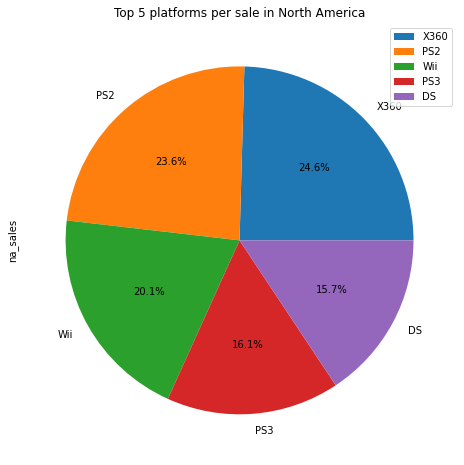

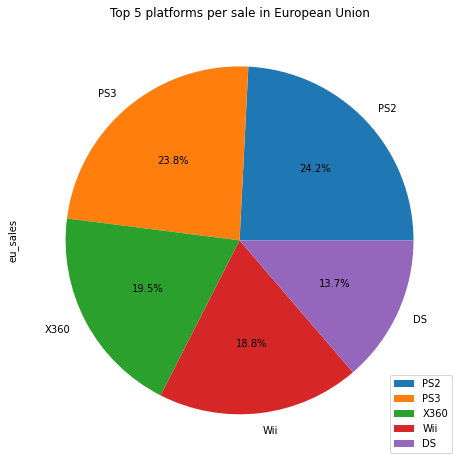

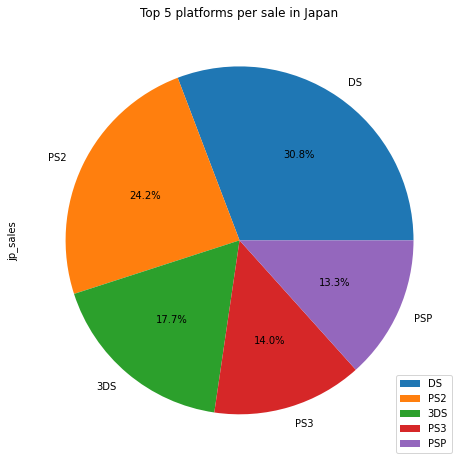

In [90]:
display(data.pivot_table(index = "platform", values = "na_sales", aggfunc = "sum")\
.sort_values(by = "na_sales", ascending = False).head(5)\
.plot(y = "na_sales",kind = "pie",figsize = (8,8), title = "Top 5 platforms per sale in North America",autopct='%1.1f%%'))

display(data.pivot_table(index = "platform", values = "eu_sales", aggfunc = "sum")\
.sort_values(by = "eu_sales", ascending = False).head(5)\
.plot(y = "eu_sales",kind = "pie",figsize = (8,8), title = "Top 5 platforms per sale in European Union",autopct='%1.1f%%'))

display(data.pivot_table(index = "platform", values = "jp_sales", aggfunc = "sum")\
.sort_values(by = "jp_sales", ascending = False).head(5)\
.plot(y = "jp_sales",kind = "pie",figsize = (8,8), title = "Top 5 platforms per sale in Japan",autopct='%1.1f%%'))

Как можно заметить, рынки Европы и Америки более схожи чем в сравнении с Японией. Рынок Америки доминирует платформа PS3 и XBox 360, они так же являются прямыми конкурентами друг с другом. 

Sony, производителю PS2 и PS3, удалось выиграть конкуренцию на рынке Европы с первыми двумя места за PS 2 и 3 генерации, сместив Xbox 360 на третье место. 

Рынок Японии немного отличается от двух других, больше всего игр продано на платформу DS, а второе и третье место имеет почти одинаковое значение и присвоено платформам PS2 и PS3. 


Из общего, можно заметить, что деление между местами по популярности продаж игр схожа по всем трем регионам. Так, первые три места занимают, 68.3, 66.4 и 67.5 процентов от первой пятёрки. Виднеется общая доминация платформы серии PS если брать общую картину.

**Genre per Region** 

<AxesSubplot:title={'center':'Top 5 genre per sale in North America'}, ylabel='na_sales'>

<AxesSubplot:title={'center':'Top 5 genre per sale in European Union'}, ylabel='eu_sales'>

<AxesSubplot:title={'center':'Top 5 genre per sale in Japan'}, ylabel='jp_sales'>

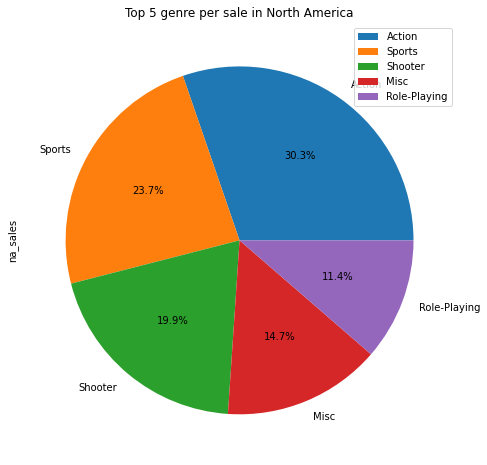

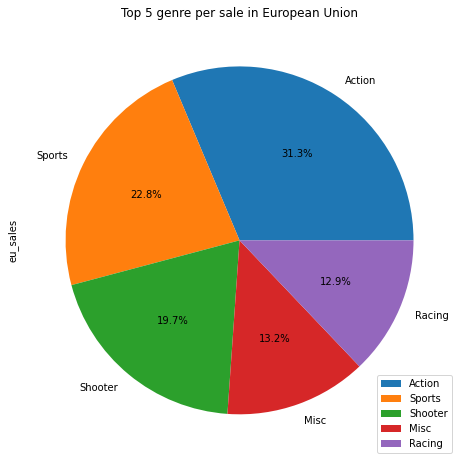

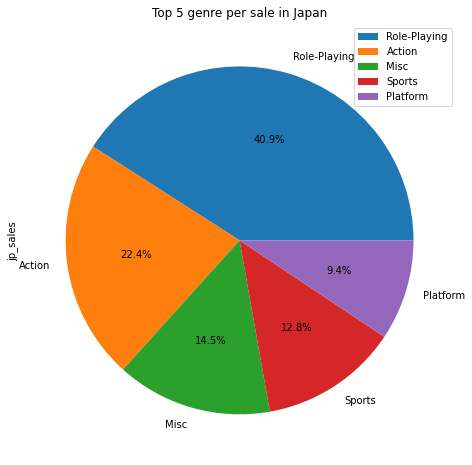

In [91]:
display(data.pivot_table(index = "genre", values = "na_sales", aggfunc = "sum")\
.sort_values(by = "na_sales", ascending = False).head(5)\
.plot(y = "na_sales",kind = "pie",figsize = (8,8), title = "Top 5 genre per sale in North America",autopct='%1.1f%%'))

display(data.pivot_table(index = "genre", values = "eu_sales", aggfunc = "sum")\
.sort_values(by = "eu_sales", ascending = False).head(5)\
.plot(y = "eu_sales",kind = "pie",figsize = (8,8), title = "Top 5 genre per sale in European Union",autopct='%1.1f%%'))

display(data.pivot_table(index = "genre", values = "jp_sales", aggfunc = "sum")\
.sort_values(by = "jp_sales", ascending = False).head(5)\
.plot(y = "jp_sales",kind = "pie",figsize = (8,8), title = "Top 5 genre per sale in Japan",autopct='%1.1f%%'))

Как можно заметить, схожесть рынков Америки и Европы еще более сильна в жанровом анализе. Оба региона имеют одинаковые первые четыре места. С самым популярным жанром Action с 29 и 31 %, и жанром Sports на втором месте. 

Схоже с платформами, рынок Японии имеет отличие в первом месте. С сильной доминацией и 40% первое место за жанром Role-Playing. 

Из общего можно выделить, что жанры Action, Sports и Misc имеет хороший спрос во всех регионах. 

**Rating per Region**

<AxesSubplot:title={'center':'Genre per Region'}, xlabel='rating'>

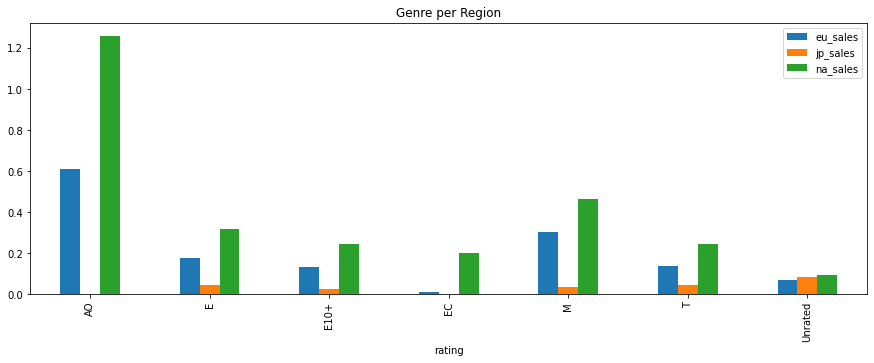

In [92]:
display(data.pivot_table(index = "rating", values = ["na_sales","eu_sales","jp_sales"], aggfunc = "mean")\
.plot(kind = "bar", figsize = (15,5), title = "Genre per Region"))

Данные показывают, что самый популярный рейтинг по всем регионам - это "М". Популярность игр рейтинга "Е", "E10+" и "T" во многом на ровне и с одинаковым распределением между регионами. 

Что говоря о "AO", в данных всего одна игра имеет этот статус, что не удивительно так как это статус 18+ и производители боятся их выпускать из-за ассоциации с играми для взрослых.

Категория EC имеет маленькое количество продаж, так как это категория только для детей, что является маленьким рынком.

Так же, не стоит забывать игры без рейтинга, их результаты выбиваются из общей группы и показывают во многом равный результат по всем регионам, что неожиданно.  

Из общего, стоит отметить, что рынок Америки является самым важным, так как там больше всего продаж по всем категориям. На втором месте рынок Европы, а с самыми маленькими продажами на третьем месте - Япония. 

<AxesSubplot:title={'center':'Genre per Region'}>

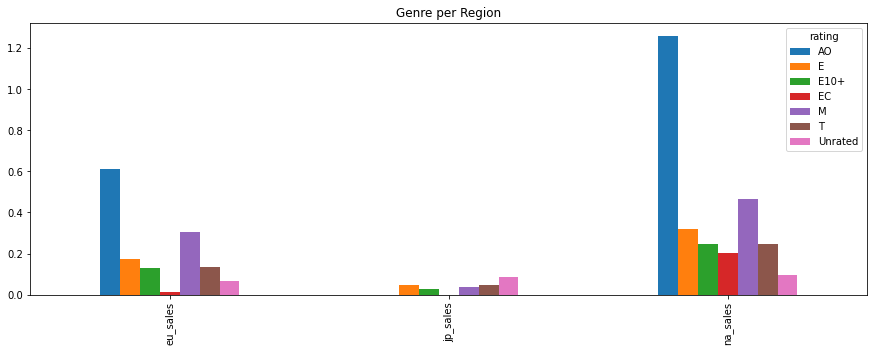

In [100]:
# код ревьюера
display(data.pivot_table(index = "rating", values = ["na_sales","eu_sales","jp_sales"], aggfunc = "mean").T\
.plot(kind = "bar", figsize = (15,5), title = "Genre per Region"))

# Проверка гипотез

В данном анализе будут два уровня статистической значимости, так как результат может оказаться в трех разделах вместо двух, что даст больше информации по значимости, в особенности есть между 1% и 5%.  

**Гипотеза - средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H_0: средний рейтинг пользователей "Xbox One" = средний рейтинг пользователей "PC"

H_1: средний рейтинг пользователей "Xbox One" ≠ средний рейтинг пользователей "PC"

alpha = 0.05 и alpha = 0.01

In [53]:
pc = data.query("platform == 'PC'")["user_score"]
pc = pc[pc.notnull()]
xbox_one = data.query("platform == 'XOne'")["user_score"]
xbox_one = xbox_one[xbox_one.notnull()]

In [54]:
print("Размер выборки PC:", len(pc))
print("Размер выборки Xbox One:", len(xbox_one))

print("Дисперия выборки PC:", np.var(pc))
print("Дисперия выборки Xbox One:", np.var(xbox_one))

Размер выборки PC: 748
Размер выборки Xbox One: 205
Дисперия выборки PC: 2.3131233378134923
Дисперия выборки Xbox One: 1.9163293277810827


Из-за большой разницы в размере выборки, значение "equal_var" будет False. 

In [55]:
results = st.ttest_ind(pc, xbox_one, equal_var = False)

alpha1 = 0.05
alpha2 = 0.01

print("P-значение:",results.pvalue)

print("При Alpha 5% - ", end = '')    
if results.pvalue < alpha1:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("При Alpha 1% - ", end = '')    
if results.pvalue < alpha2:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")    

P-значение: 0.00011201882808988591
При Alpha 5% - Отвергаем нулевую гипотезу
При Alpha 1% - Отвергаем нулевую гипотезу


Даже с уровнем статистической значимости в 1%, гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые - является не верной. 

**Гипотеза - средние пользовательские рейтинги жанров Action и Sports разные**

H_0: средний рейтинг жанра "Action" = средний рейтинг жанра "Sports"

H_1: средний рейтинг жанра "Action" ≠ средний рейтинг жанра "Sports"

alpha = 0.05 и alpha = 0.01

In [56]:
action = data.query("genre == 'Action'")["user_score"]
action = action[action.notnull()]
sports = data.query("genre == 'Sports'")["user_score"]
sports = sports[sports.notnull()]

In [57]:
print("Размер выборки Action:", len(action))
print("Размер выборки Sports:", len(sports))

print("Дисперия выборки Action:", np.var(action))
print("Дисперия выборки Sports:", np.var(sports))

Размер выборки Action: 2042
Размер выборки Sports: 1289
Дисперия выборки Action: 2.005657068361663
Дисперия выборки Sports: 2.5690683536350125


Из-за большой разницы в размере выборки, значение "equal_var" будет False. 

In [58]:
results = st.ttest_ind(action, sports, equal_var = False)

alpha1 = 0.05
alpha2 = 0.01

print("P-значение:",results.pvalue)

print("При Alpha 5% - ", end = '')    
if results.pvalue < alpha1:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("При Alpha 1% - ", end = '')    
if results.pvalue < alpha2:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")   

P-значение: 0.19888874501933534
При Alpha 5% - Не получилось отвергнуть нулевую гипотезу
При Alpha 1% - Не получилось отвергнуть нулевую гипотезу


Даже с уровнем статистической значимости в 5%, гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные - не верна.

# Общий вывод

Следуя из проделанной работы, можно сделать вывод, что за период с 1980 по 2016 произошло много изменений в мире игр. Было выяснено, что играя индустрия начала свой основной рост только в 1995 году и достигла пика по выпуску игр в 2008 году. При этом, за все эти периоды, популярность разных консолей была разной и как было открыто, что это было связано с жизненными циклами платформ, которые в среднем составляли 8 лет.  Говоря, о жизненных циклах платформ, попытка спрогнозировать следующую популярную платформу была сделана, однако, было выявлено, что есть пропуск в данных, в которых и скрывается ответ на будущее, но есть и безопасный вариант с выбором платформы которая выпустит новую генерацию в ближайшем времени.

Из грустных вещей, было выведено, что большинство игр не достигают успехов и только некоторые получают по-настоящему большие продажи. И одним из лучших способов увеличить шансы игры на успех - это получить высокую оценку от критиков, так как их оценка влияет на успех игры. Или же, выбрать один из популярных жанров: Shooter, Sports, Fighting. 

Был сделан сравнительный анализ без тремя регионами: Северная Америка, Европейский Союз и Япония. Была обнаруженно, что рынок Америки и Европы сход по жанрам и платформам, а  Японский имеет совсем другую картину. Поэтому, при выходе на Японский рынок его нужно изучить тщательней. Но лучше сфокусироваться на Американский, так как там больше всего продаж. А если еще сильней хочется получить успех, то лучше выбрать рейтинг "M" для игры, так как у него лучше продажи в сравнении со другими.
 

Было проверено две гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Гипотеза оказалась не правдивой 

- средние пользовательские рейтинги жанров Action и Sports разные

Гипотеза оказалась не правдивой